# TensorFlow Regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

## Creating random artificial dataset

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [9]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
y_df.head()

,Y
0,4.697347
1,4.445918
2,5.783409
3,3.542638
4,4.456698


In [11]:
my_data = pd.concat([x_df, y_df], axis=1)

In [12]:
my_data.head()

,X Data,Y
0,0.00000,4.697347
1,0.00001,4.445918
2,0.00002,5.783409
3,0.00003,3.542638
4,0.00004,4.456698


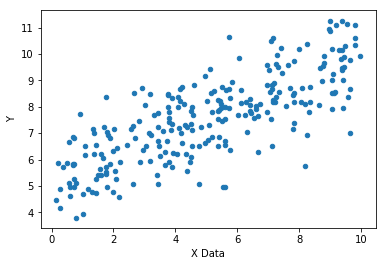

In [15]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

## Building graph

In [16]:
batch_size = 8

In [19]:
np.random.randn(2)

array([ 1.16370072, -0.55184416])

In [20]:
m = tf.Variable(1.16)
b = tf.Variable(0.55)

In [21]:
xph = tf.placeholder(tf.float32, [batch_size])

In [22]:
yph = tf.placeholder(tf.float32, [batch_size])

In [24]:
y_model = m*xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [28]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        # selecting random data points from whole dataset
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m, b])

In [40]:
model_m

0.54790682

In [41]:
model_b

4.9825759

In [42]:
y_hat = x_data*model_m + model_b

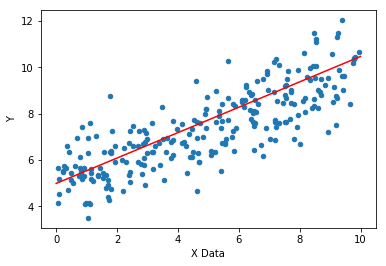

In [43]:
my_data.sample(250).plot(kind='scatter', x='X Data', y="Y")
plt.plot(x_data, y_hat, 'r')